In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [64]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
base = automap_base()
base.prepare(engine, reflect=True)

# reflect the tables
station = base.classes.station
measurement = base.classes.measurement

In [11]:
# View all of the classes that automap found
all_classes = base.classes
for class_name in all_classes.keys():
    print(class_name)

measurement
station


In [8]:
# Save references to each table
measurement_class = base.classes.measurement
station_class = base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [78]:
# Find the most recent date in the data set.
engine.execute('SELECT max(date) FROM Measurement').fetchall()

[('2017-08-23',)]

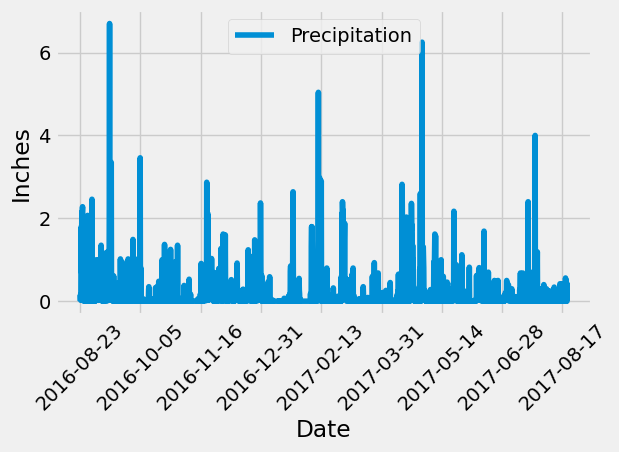

In [79]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores
precipitation_data = (
    session.query(measurement_class.date, measurement_class.prcp)
    .filter(measurement_class.date >= '2016-08-23').filter(measurement.date <= '2017-08-23')
    .order_by(measurement_class.date)
    .all()
)
    
# Save the query results as a Pandas DataFrame. Explicitly set the column names
column_names = ['Date', 'Precipitation']
precipitation_df = pd.DataFrame(precipitation_data, columns=column_names).set_index('Date')

# Sort the dataframe by date
precipitation_df=precipitation_df.sort_values(by='Date').dropna()

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(rot=45)
plt.savefig("Precipitation analysis.png")
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend()
plt.tight_layout()
plt.show()

In [73]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [90]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(station.id).count() 
station_count

9

In [89]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = (session.query(measurement.station, func.count(measurement.station))
                    .group_by(measurement.station).order_by(func.count(measurement.station).desc()).all())
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [92]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_number = 'USC00519281'
session.query(func.min(measurement.tobs),
              func.max(measurement.tobs),
              func.avg(measurement.tobs)).filter(measurement.station == station_number).all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

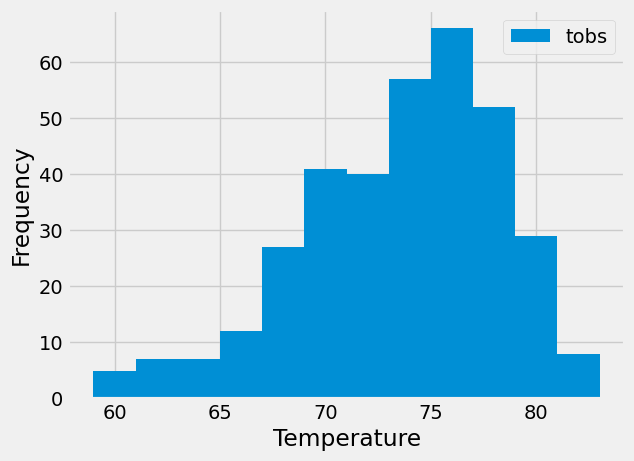

In [96]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station = station_activity[0][0]

results = (session.query(measurement.date, measurement.tobs)
                        .filter(measurement.date >= "2016-08-24")
                        .filter(measurement.date <= "2017-08-23")
                        .filter(measurement.station == most_active_station)).all()

# convert to dataframe
results_df = pd.DataFrame(results)

# historgram 
results_df.plot.hist(bins=12)
plt.xlabel('Temperature')

# Close Session

In [97]:
# Close Session
session.close()